In [1]:
import os  # For file and directory operations
import glob  # For finding file paths with patterns
from collections import Counter  # For counting hashable items
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.manifold import TSNE  # For dimensionality reduction (t-SNE)
import umap  # For dimensionality reduction (UMAP)
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical graphics
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.cluster import AgglomerativeClustering  # For hierarchical clustering
from sklearn.metrics import silhouette_score  # For evaluating clustering quality


2024-05-24 17:05:27.261635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 17:05:27.261701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 17:05:27.263124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 1. Data Preprocessing

In [2]:
# specify csv file path
input_directory_path = "/kaggle/input/facs-data/FACS/"
# mean threshold value to filter columns
THRESHOLD = 50

In [3]:
# read all csv file paths
file_paths = glob.glob(f"{os.path.normpath(input_directory_path)}/*csv")
print(file_paths)

['/kaggle/input/facs-data/FACS/Limb_Muscle-counts.csv', '/kaggle/input/facs-data/FACS/Lung-counts.csv', '/kaggle/input/facs-data/FACS/Fat-counts.csv', '/kaggle/input/facs-data/FACS/Kidney-counts.csv', '/kaggle/input/facs-data/FACS/Thymus-counts.csv', '/kaggle/input/facs-data/FACS/Skin-counts.csv', '/kaggle/input/facs-data/FACS/Diaphragm-counts.csv', '/kaggle/input/facs-data/FACS/Large_Intestine-counts.csv', '/kaggle/input/facs-data/FACS/Trachea-counts.csv', '/kaggle/input/facs-data/FACS/Aorta-counts.csv', '/kaggle/input/facs-data/FACS/Heart-counts.csv', '/kaggle/input/facs-data/FACS/Marrow-counts.csv', '/kaggle/input/facs-data/FACS/Liver-counts.csv', '/kaggle/input/facs-data/FACS/Tongue-counts.csv', '/kaggle/input/facs-data/FACS/Brain_Non-Myeloid-counts.csv', '/kaggle/input/facs-data/FACS/Mammary_Gland-counts.csv', '/kaggle/input/facs-data/FACS/Bladder-counts.csv', '/kaggle/input/facs-data/FACS/Pancreas-counts.csv', '/kaggle/input/facs-data/FACS/Brain_Myeloid-counts.csv', '/kaggle/inpu

In [4]:
dtypes = {col : np.int32 for col in pd.read_csv(file_paths[0], nrows=1).columns[1:]}
test_df = pd.read_csv(file_paths[0], dtype=dtypes, converters={0:str}, index_col=0)
test_df

,L4.D042103.3_11_M.1,D1.D042103.3_11_M.1,N2.D042103.3_11_M.1,H4.D042103.3_11_M.1,E1.D042103.3_11_M.1,A6.D042103.3_11_M.1,O2.D042103.3_11_M.1,I4.D042103.3_11_M.1,F1.D042103.3_11_M.1,G1.D042103.3_11_M.1,...,O17.D042473.3_10_M.1.1,P19.D042473.3_10_M.1.1,I5.D042473.3_10_M.1.1,L22.D042473.3_10_M.1.1,O18.D042473.3_10_M.1.1,P20.D042473.3_10_M.1.1,I18.D042473.3_10_M.1.1,M19.D042473.3_10_M.1.1,O19.D042473.3_10_M.1.1,P21.D042473.3_10_M.1.1
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,444,0,0,0,1,0,0,326,0,0,...,0,0,69,585,0,325,303,2,0,0
0610007L01Rik,253,0,19,0,0,0,1,7,0,186,...,0,0,5,0,2,0,0,0,0,1
0610007N19Rik,194,0,0,0,0,0,0,256,0,0,...,0,0,1,118,0,0,19,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,8,0,...,0,0,88,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zzef1,0,0,0,0,98,0,0,302,0,0,...,0,0,0,0,0,0,0,81,0,0
Zzz3,261,0,0,0,0,50,0,0,0,54,...,0,0,0,0,0,0,0,7,0,0
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l7Rn6,481,0,0,0,0,0,31,0,0,0,...,0,0,0,91,0,0,75,0,0,0


In [5]:
test_df.describe()

,L4.D042103.3_11_M.1,D1.D042103.3_11_M.1,N2.D042103.3_11_M.1,H4.D042103.3_11_M.1,E1.D042103.3_11_M.1,A6.D042103.3_11_M.1,O2.D042103.3_11_M.1,I4.D042103.3_11_M.1,F1.D042103.3_11_M.1,G1.D042103.3_11_M.1,...,O17.D042473.3_10_M.1.1,P19.D042473.3_10_M.1.1,I5.D042473.3_10_M.1.1,L22.D042473.3_10_M.1.1,O18.D042473.3_10_M.1.1,P20.D042473.3_10_M.1.1,I18.D042473.3_10_M.1.1,M19.D042473.3_10_M.1.1,O19.D042473.3_10_M.1.1,P21.D042473.3_10_M.1.1
count,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,...,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000,23433.000000
mean,59.025221,36.660906,38.931976,44.631076,29.776597,13.354415,30.543379,52.546409,38.269364,31.973542,...,14.298895,16.484402,34.795715,39.320318,9.343063,53.152691,59.414970,18.191866,2.114369,9.391926
std,499.332344,467.261142,384.488250,551.498682,323.380537,172.460703,375.532120,623.473700,404.770848,388.128862,...,226.455323,330.995766,963.713312,559.167518,160.817407,809.949211,1126.604655,259.290068,198.730577,143.063434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33478.000000,28210.000000,28263.000000,67945.000000,17401.000000,13706.000000,25677.000000,67892.000000,27030.000000,27069.000000,...,27063.000000,43480.000000,138057.000000,46185.000000,21423.000000,75265.000000,139535.000000,34912.000000,29300.000000,10987.000000


In [6]:
np.max(test_df.max())

1242300

In [7]:
np.min(test_df.min())

0

In [8]:
cov_df = test_df.cov()
cov_df

,L4.D042103.3_11_M.1,D1.D042103.3_11_M.1,N2.D042103.3_11_M.1,H4.D042103.3_11_M.1,E1.D042103.3_11_M.1,A6.D042103.3_11_M.1,O2.D042103.3_11_M.1,I4.D042103.3_11_M.1,F1.D042103.3_11_M.1,G1.D042103.3_11_M.1,...,O17.D042473.3_10_M.1.1,P19.D042473.3_10_M.1.1,I5.D042473.3_10_M.1.1,L22.D042473.3_10_M.1.1,O18.D042473.3_10_M.1.1,P20.D042473.3_10_M.1.1,I18.D042473.3_10_M.1.1,M19.D042473.3_10_M.1.1,O19.D042473.3_10_M.1.1,P21.D042473.3_10_M.1.1
L4.D042103.3_11_M.1,249332.790205,87771.566038,89502.339075,141697.884262,66456.961464,40889.121865,66237.281191,222309.999747,92389.328090,72903.257453,...,49903.836137,84130.288312,2.931128e+05,206144.253657,37127.332419,155692.033704,3.941538e+05,68182.951844,44926.368061,26172.297216
D1.D042103.3_11_M.1,87771.566038,218332.975143,92530.128307,136479.664755,84443.177614,38660.713562,52258.522605,94128.144365,131100.178660,119120.461709,...,35867.287898,64489.720342,1.601030e+05,109302.492329,24785.597771,112837.245659,2.158160e+05,48258.667146,28219.903456,25118.047168
N2.D042103.3_11_M.1,89502.339075,92530.128307,147831.214731,120105.948486,63358.872776,41413.359804,64977.321191,89753.468546,103437.311257,63824.592046,...,45703.050206,81461.882560,2.092859e+05,110475.152765,33624.295871,142426.455676,2.375932e+05,63550.078262,38948.000866,27106.066521
H4.D042103.3_11_M.1,141697.884262,136479.664755,120105.948486,304150.796161,108571.537798,63042.294679,106870.470532,137837.066776,148560.755704,140194.894344,...,91115.856903,149576.827785,4.209482e+05,158938.694911,70025.318017,263674.225589,4.482151e+05,115425.257626,88919.944594,44721.863144
E1.D042103.3_11_M.1,66456.961464,84443.177614,63358.872776,108571.537798,104574.971555,36159.028993,56062.704574,61918.497203,94780.979094,77512.575559,...,35179.201422,59752.893942,1.174869e+05,59780.741715,24622.077455,104925.850176,1.414515e+05,40821.626298,27256.545353,23875.134762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P20.D042473.3_10_M.1.1,155692.033704,112837.245659,142426.455676,263674.225589,104925.850176,60831.660503,234688.134252,148516.266684,140356.886873,103780.116109,...,144984.038945,187053.220075,4.636803e+05,177254.364967,92620.670003,656017.724465,4.876129e+05,130050.465752,95647.435976,85594.538097
I18.D042473.3_10_M.1.1,394153.796891,215816.030316,237593.186773,448215.106197,141451.543845,117665.107830,173367.739125,511012.684181,234315.187936,166121.578153,...,169581.941855,284205.141288,1.001130e+06,549436.556172,132130.672032,487612.924259,1.269238e+06,226440.120745,176200.345932,74049.925056
M19.D042473.3_10_M.1.1,68182.951844,48258.667146,63550.078262,115425.257626,40821.626298,27404.874725,50204.912170,66562.994808,56866.279316,45320.547625,...,45431.708269,73416.999493,2.142777e+05,80055.757249,35026.065790,130050.465752,2.264401e+05,67231.339594,45531.895519,21858.535716
O19.D042473.3_10_M.1.1,44926.368061,28219.903456,38948.000866,88919.944594,27256.545353,20280.373727,38858.735010,44709.892567,37996.045967,29906.483139,...,36749.511649,58075.704626,1.736723e+05,57736.936563,29078.881555,95647.435976,1.762003e+05,45531.895519,39493.842331,17300.265391


In [9]:
np.linalg.eigvals(cov_df)

array([1.48801538e+09, 4.44189671e+07, 1.11619349e+07, ...,
       1.09511341e+03, 1.07760858e+03, 1.07876503e+03])

In [10]:
test_df.iloc[0, [1, 4, 6, 7, 10]]

D1.D042103.3_11_M.1    0
E1.D042103.3_11_M.1    0
O2.D042103.3_11_M.1    0
I4.D042103.3_11_M.1    0
P2.D042103.3_11_M.1    0
Name: 0610005C13Rik, dtype: int32

In [11]:
x = np.array([4, 6, 2, 1, 5, 7, 9, 8, 3])
np.argmax(x)

6

In [12]:
np.argsort(x)

array([3, 2, 8, 0, 4, 1, 5, 7, 6])

In [13]:
cov_df.columns[np.argsort(np.linalg.eigvals(cov_df))]

Index(['P12.B002769.3_39_F.1.1', 'G5.B002769.3_39_F.1.1',
       'J15.B002769.3_39_F.1.1', 'H18.B002769.3_39_F.1.1',
       'P13.B002769.3_39_F.1.1', 'E12.B002769.3_39_F.1.1',
       'N19.D042473.3_10_M.1.1', 'J16.D042473.3_10_M.1.1',
       'P4.D042473.3_10_M.1.1', 'N18.D042473.3_10_M.1.1',
       ...
       'G1.D042103.3_11_M.1', 'F1.D042103.3_11_M.1', 'I4.D042103.3_11_M.1',
       'O2.D042103.3_11_M.1', 'A6.D042103.3_11_M.1', 'E1.D042103.3_11_M.1',
       'H4.D042103.3_11_M.1', 'N2.D042103.3_11_M.1', 'D1.D042103.3_11_M.1',
       'L4.D042103.3_11_M.1'],
      dtype='object', length=1151)

In [14]:
# first filename
os.path.basename(file_paths[0])

'Limb_Muscle-counts.csv'

In [15]:
# map filepath with numeric value
map_dict = {path : n for n, path in enumerate(file_paths, 1)}
map_dict

{'/kaggle/input/facs-data/FACS/Limb_Muscle-counts.csv': 1,
 '/kaggle/input/facs-data/FACS/Lung-counts.csv': 2,
 '/kaggle/input/facs-data/FACS/Fat-counts.csv': 3,
 '/kaggle/input/facs-data/FACS/Kidney-counts.csv': 4,
 '/kaggle/input/facs-data/FACS/Thymus-counts.csv': 5,
 '/kaggle/input/facs-data/FACS/Skin-counts.csv': 6,
 '/kaggle/input/facs-data/FACS/Diaphragm-counts.csv': 7,
 '/kaggle/input/facs-data/FACS/Large_Intestine-counts.csv': 8,
 '/kaggle/input/facs-data/FACS/Trachea-counts.csv': 9,
 '/kaggle/input/facs-data/FACS/Aorta-counts.csv': 10,
 '/kaggle/input/facs-data/FACS/Heart-counts.csv': 11,
 '/kaggle/input/facs-data/FACS/Marrow-counts.csv': 12,
 '/kaggle/input/facs-data/FACS/Liver-counts.csv': 13,
 '/kaggle/input/facs-data/FACS/Tongue-counts.csv': 14,
 '/kaggle/input/facs-data/FACS/Brain_Non-Myeloid-counts.csv': 15,
 '/kaggle/input/facs-data/FACS/Mammary_Gland-counts.csv': 16,
 '/kaggle/input/facs-data/FACS/Bladder-counts.csv': 17,
 '/kaggle/input/facs-data/FACS/Pancreas-counts.

In [16]:
# map reverse the numeric value with filename
map_dict_rev = {n : os.path.basename(path).split("-count")[0] for path, n in map_dict.items()}
map_dict_rev

{1: 'Limb_Muscle',
 2: 'Lung',
 3: 'Fat',
 4: 'Kidney',
 5: 'Thymus',
 6: 'Skin',
 7: 'Diaphragm',
 8: 'Large_Intestine',
 9: 'Trachea',
 10: 'Aorta',
 11: 'Heart',
 12: 'Marrow',
 13: 'Liver',
 14: 'Tongue',
 15: 'Brain_Non-Myeloid',
 16: 'Mammary_Gland',
 17: 'Bladder',
 18: 'Pancreas',
 19: 'Brain_Myeloid',
 20: 'Spleen'}

## 1.1 Concatenate csv files

In [17]:
labels = []  # save mapped filepath numeric values
df_lists = []  # save all read csv file for concatenation

# iterate over file paths
for file_path in file_paths:
    columns = pd.read_csv(file_path, nrows=1).columns[1:]
    dtypes = {col : np.int32 for col in columns}
    df = pd.read_csv(file_path, dtype=dtypes, index_col=0, converters={0 : str})
    df = df.loc[:, df.mean(axis=0) > THRESHOLD]
    labels += [map_dict[file_path]] * df.shape[1]
    df_lists.append(df.T)


In [18]:
# concatenate all csv files
merged_df = pd.concat(df_lists, axis=0)
merged_df

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
L4.D042103.3_11_M.1,0,444,253,194,0,151,0,0,0,0,...,0,0,0,0,1126,0,261,0,481,0
I4.D042103.3_11_M.1,0,326,7,256,0,0,0,0,0,0,...,0,0,0,0,0,302,0,0,0,0
J1.D042103.3_11_M.1,0,713,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
M4.D042103.3_11_M.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,104,0,0,0,0,0
K1.D042103.3_11_M.1,0,35,0,0,0,0,0,0,0,0,...,0,28,0,0,190,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1.B001750.3_38_F.1.1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,449,0,0,0,0,0
J19.B001750.3_38_F.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M10.B001750.3_38_F.1.1,0,26,20,0,0,238,0,0,0,87,...,0,0,0,14,1,0,0,0,97,0
B1.B001750.3_38_F.1.1,0,1283,529,0,0,0,296,0,0,0,...,0,0,0,0,803,0,0,0,538,0


In [19]:
# delete the df_lists variable to save memory
del df_lists

In [20]:
Counter(labels)

Counter({3: 1414,
         11: 1164,
         15: 1023,
         8: 904,
         12: 830,
         18: 675,
         19: 547,
         16: 464,
         2: 369,
         6: 281,
         5: 261,
         17: 237,
         13: 236,
         1: 182,
         14: 178,
         9: 132,
         10: 102,
         20: 98,
         4: 51,
         7: 26})

In [21]:
# Remove columns with all zero values
merged_df = merged_df.loc[:, merged_df.mean(axis=0) > THRESHOLD]
merged_df


,0610007C21Rik,0610007L01Rik,0610007P14Rik,0610009D07Rik,0610010K14Rik,0610010O12Rik,0610011F06Rik,0610011L14Rik,0610012G03Rik,0610030E20Rik,...,Zmynd8,Znf512b,Znfx1,Znhit2-ps,Znrf1,Znrf3,Zranb2,Zwint,Zyx,l7Rn6
L4.D042103.3_11_M.1,444,253,151,0,0,0,0,0,0,0,...,0,520,0,0,0,0,0,0,1126,481
I4.D042103.3_11_M.1,326,7,0,2,65,0,0,0,0,0,...,0,0,2,0,383,0,0,0,0,0
J1.D042103.3_11_M.1,713,0,0,472,0,421,0,0,0,395,...,0,0,0,252,102,326,0,0,1,0
M4.D042103.3_11_M.1,0,0,0,0,66,0,0,0,0,0,...,0,1469,0,0,0,0,0,0,104,0
K1.D042103.3_11_M.1,35,0,0,0,0,0,0,1,0,16,...,7,0,0,0,0,0,0,0,190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1.B001750.3_38_F.1.1,0,0,0,431,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,449,0
J19.B001750.3_38_F.1.1,0,0,0,237,0,0,261,0,0,24,...,86,0,0,0,0,0,0,0,0,0
M10.B001750.3_38_F.1.1,26,20,238,247,149,0,114,0,77,0,...,5,10,0,127,0,0,292,0,1,97
B1.B001750.3_38_F.1.1,1283,529,0,323,1,0,1,0,0,0,...,31,0,0,0,0,0,0,0,803,538


In [22]:
cov_df = merged_df.cov()
cov_df

,0610007C21Rik,0610007L01Rik,0610007P14Rik,0610009D07Rik,0610010K14Rik,0610010O12Rik,0610011F06Rik,0610011L14Rik,0610012G03Rik,0610030E20Rik,...,Zmynd8,Znf512b,Znfx1,Znhit2-ps,Znrf1,Znrf3,Zranb2,Zwint,Zyx,l7Rn6
0610007C21Rik,205020.799976,5933.355820,6975.101346,1459.753316,5012.502470,10418.339557,11426.313796,5796.314528,12613.589258,3285.750113,...,5391.988349,9028.166872,1058.980297,3036.551607,-2389.961769,23086.366735,3485.139386,10739.189675,16372.225913,9673.008349
0610007L01Rik,5933.355820,50935.655852,2352.760785,2786.999210,2469.688351,3775.010309,2674.543488,-126.581639,1203.316103,-162.517802,...,893.561768,1507.943833,1940.510867,1719.183657,-716.197415,1047.743217,793.288676,3439.348199,2188.553207,1745.098036
0610007P14Rik,6975.101346,2352.760785,34729.510027,5529.011192,1630.271067,11589.048898,7121.944750,1470.910914,3998.842681,604.173555,...,2851.585756,1149.611653,-1308.203887,850.053689,260.854341,5587.289670,2081.726642,4592.421884,-345.353864,3733.783817
0610009D07Rik,1459.753316,2786.999210,5529.011192,54224.296420,3468.234268,11414.098033,6411.182702,4860.005869,3780.870972,3083.882171,...,2267.812183,2195.513586,-1238.523290,1553.180707,2885.983055,635.628610,3791.620538,10184.871782,6478.293021,4152.692234
0610010K14Rik,5012.502470,2469.688351,1630.271067,3468.234268,26051.257658,157.087994,804.839176,1058.089588,1326.505004,1362.338615,...,1557.402988,296.891787,506.847876,2081.583340,1340.089126,745.985668,2617.479648,5171.863809,2550.511562,2447.039349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Znrf3,23086.366735,1047.743217,5587.289670,635.628610,745.985668,4044.798632,3562.247895,-167.282606,4180.952601,3310.123994,...,4028.094443,5904.364335,-1714.825149,5021.040764,885.750246,92301.972373,417.080778,1906.686458,38371.127607,3366.747141
Zranb2,3485.139386,793.288676,2081.726642,3791.620538,2617.479648,2859.784138,975.882000,4595.175413,877.967384,1376.497737,...,1808.167056,517.929897,232.385384,1141.785031,643.952866,417.080778,19909.121484,4294.758083,846.599043,1469.779296
Zwint,10739.189675,3439.348199,4592.421884,10184.871782,5171.863809,6906.103686,6446.216053,3535.668994,5163.504855,1148.446584,...,5231.897733,3402.085170,-1161.903312,2740.692250,3523.095823,1906.686458,4294.758083,87412.149876,74.709265,4543.917877
Zyx,16372.225913,2188.553207,-345.353864,6478.293021,2550.511562,-17068.927810,-4523.861889,-1361.971936,2305.231781,4098.909721,...,4055.536772,6938.943136,767.747250,3470.182486,2025.031579,38371.127607,846.599043,74.709265,230684.606913,3184.596910


In [23]:
eigen_values = np.linalg.eigvals(cov_df)
eigen_values


array([6.11761272e+10, 7.68572002e+09, 3.53741263e+09, ...,
       4.27769370e+03, 4.28032853e+03, 4.28507148e+03])

In [24]:
columns = cov_df.columns[np.argsort(eigen_values)][-1000:]
merged_df = merged_df[columns]
merged_df


,Cenpb,Celf2,Celf1,Cela3b,Cela2a,Cela1,Cebpg,Cel,Cebpd,Cebpb,...,0610030E20Rik,0610012G03Rik,0610011L14Rik,0610011F06Rik,0610010O12Rik,0610010K14Rik,0610009D07Rik,0610007P14Rik,0610007L01Rik,0610007C21Rik
L4.D042103.3_11_M.1,222,379,0,0,0,0,353,0,718,1413,...,0,0,0,0,0,0,0,151,253,444
I4.D042103.3_11_M.1,0,107,0,0,0,0,3,0,1275,773,...,0,0,0,0,0,65,2,0,7,326
J1.D042103.3_11_M.1,0,42,0,0,0,0,0,0,9026,3596,...,395,0,0,0,421,0,472,0,0,713
M4.D042103.3_11_M.1,0,0,0,0,0,0,0,0,1158,711,...,0,0,0,0,0,66,0,0,0,0
K1.D042103.3_11_M.1,0,241,77,0,0,0,0,0,11849,6400,...,16,0,1,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1.B001750.3_38_F.1.1,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,431,0,0,0
J19.B001750.3_38_F.1.1,1,0,0,0,0,0,0,0,0,0,...,24,0,0,261,0,0,237,0,0,0
M10.B001750.3_38_F.1.1,138,224,7,0,0,0,58,0,0,138,...,0,77,0,114,0,149,247,238,20,26
B1.B001750.3_38_F.1.1,0,2,1044,0,0,0,1,0,0,0,...,0,0,0,1,0,1,323,0,529,1283


## 1.2 Data Normalization

In [25]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the data
merged_df = scaler.fit_transform(merged_df)
merged_df


array([[ 0.25789878,  0.24705133, -0.34260375, ...,  0.38906381,
         0.69442875,  0.28981584],
       [-0.48475467, -0.23331261, -0.34260375, ..., -0.42124636,
        -0.39562478,  0.02919645],
       [-0.48475467, -0.34810547, -0.34260375, ..., -0.42124636,
        -0.42664256,  0.88393969],
       ...,
       [-0.02310523, -0.02668547, -0.31109582, ...,  0.85593126,
        -0.33802033, -0.63339521],
       [-0.48475467, -0.41874723,  4.3565793 , ..., -0.42124636,
         1.91741564,  2.14286384],
       [-0.48475467, -0.39932074, -0.34260375, ..., -0.42124636,
        -0.42664256,  1.61941643]])

# 2. Applying tSNE

In [26]:
# Apply t-SNE to reduce to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(merged_df)
X_tsne


array([[ 31.859024, -15.028735],
       [ 25.939014,  -8.382737],
       [ 21.176222, -26.057034],
       ...,
       [-28.303623,  24.329477],
       [-16.362642,  19.322641],
       [ -8.800154,  20.425907]], dtype=float32)

In [27]:
# Convert the reduced data to a DataFrame for easy plotting
df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE_1', 'tSNE_2'])
df_tsne['labels'] = labels
df_tsne['labels'] = df_tsne['labels'].replace(map_dict_rev)
df_tsne


,tSNE_1,tSNE_2,labels
0,31.859024,-15.028735,Limb_Muscle
1,25.939014,-8.382737,Limb_Muscle
2,21.176222,-26.057034,Limb_Muscle
3,3.956384,-10.671488,Limb_Muscle
4,20.989801,-26.132673,Limb_Muscle
...,...,...,...
9169,-11.178082,21.288740,Spleen
9170,-10.038511,20.729340,Spleen
9171,-28.303623,24.329477,Spleen
9172,-16.362642,19.322641,Spleen


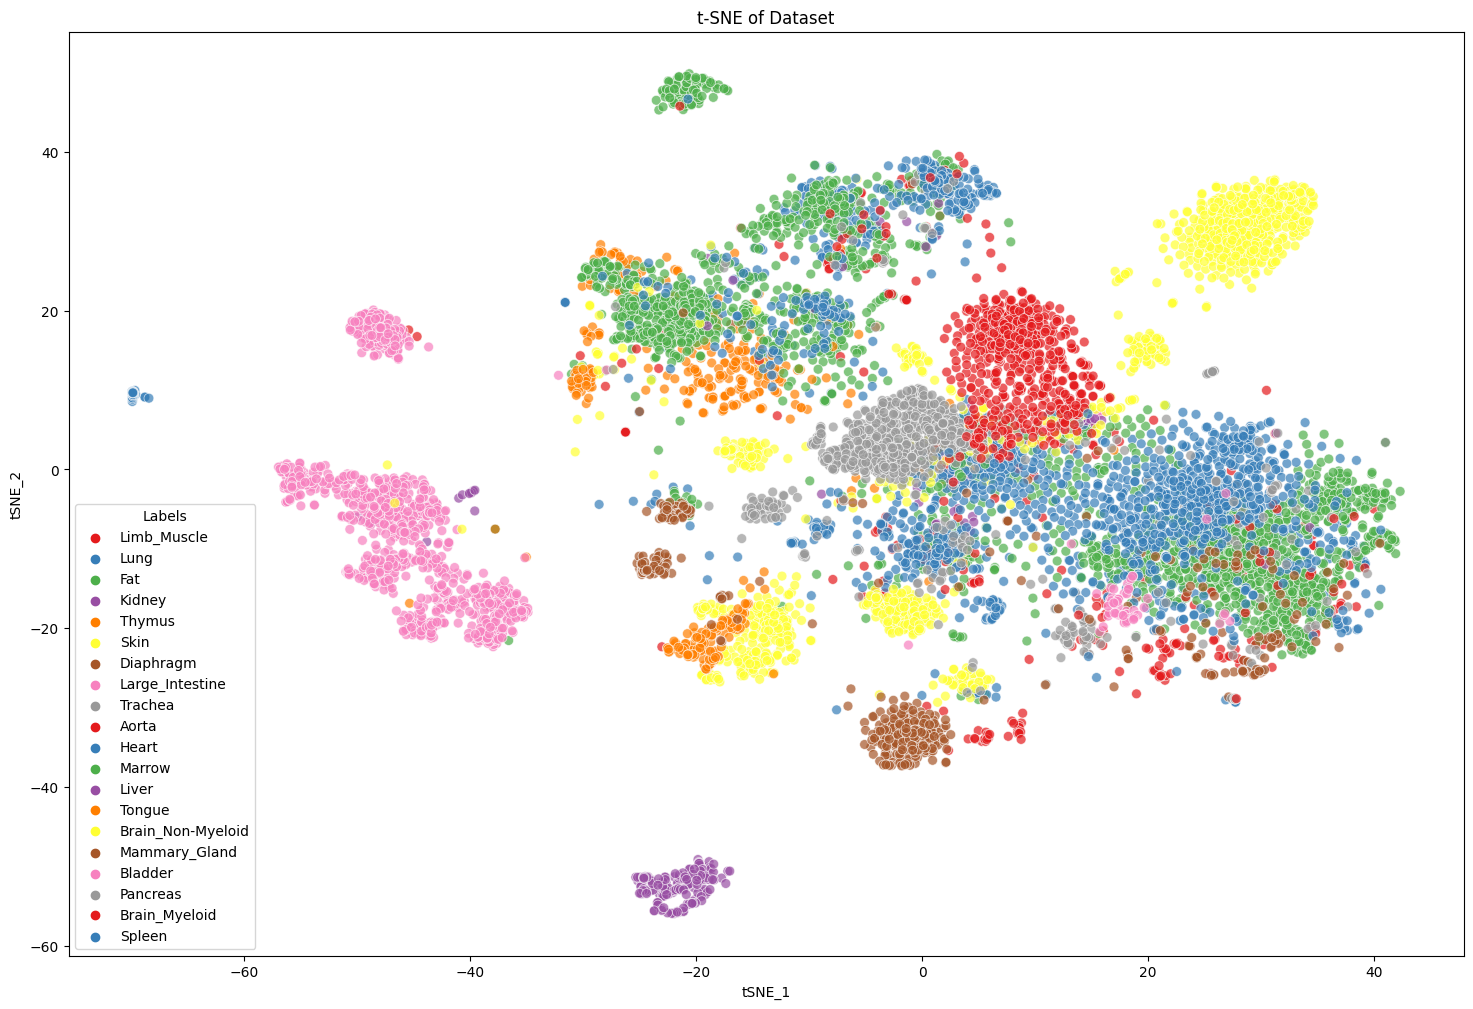

In [28]:
# Plotting the t-SNE result
plt.figure(figsize=(18, 12))
sns.scatterplot(x='tSNE_1', y='tSNE_2', hue='labels', data=df_tsne, palette='Set1', s=50, alpha=0.7)
plt.title('t-SNE of Dataset')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.legend(title='Labels')
plt.savefig("tSNE_plot.png", format='png', dpi=300)
plt.show()


# 3. Applying UMAP

In [29]:
# Apply UMAP to reduce to 2 dimensions for visualization
umap_reducer = umap.UMAP(n_components=2, random_state=0, low_memory=True)
X_umap = umap_reducer.fit_transform(merged_df)
X_umap


/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


array([[-9.0381422e+00,  3.5055761e+00],
       [-8.1381063e+00,  3.4269910e+00],
       [-7.8765883e+00,  4.5315685e+00],
       ...,
       [ 1.3121215e+00,  4.4914255e+00],
       [ 4.5281616e-01,  5.9567370e+00],
       [-7.6645408e-03,  4.6627984e+00]], dtype=float32)

In [30]:
# Convert the reduced data to a DataFrame for easy plotting
df_umap = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['labels'] = labels
df_umap['labels'] = df_umap['labels'].replace(map_dict_rev)
df_umap


,UMAP1,UMAP2,labels
0,-9.038142,3.505576,Limb_Muscle
1,-8.138106,3.426991,Limb_Muscle
2,-7.876588,4.531569,Limb_Muscle
3,-3.777675,3.483729,Limb_Muscle
4,-7.759209,4.531310,Limb_Muscle
...,...,...,...
9169,0.170227,4.831619,Spleen
9170,0.047409,4.737105,Spleen
9171,1.312122,4.491426,Spleen
9172,0.452816,5.956737,Spleen


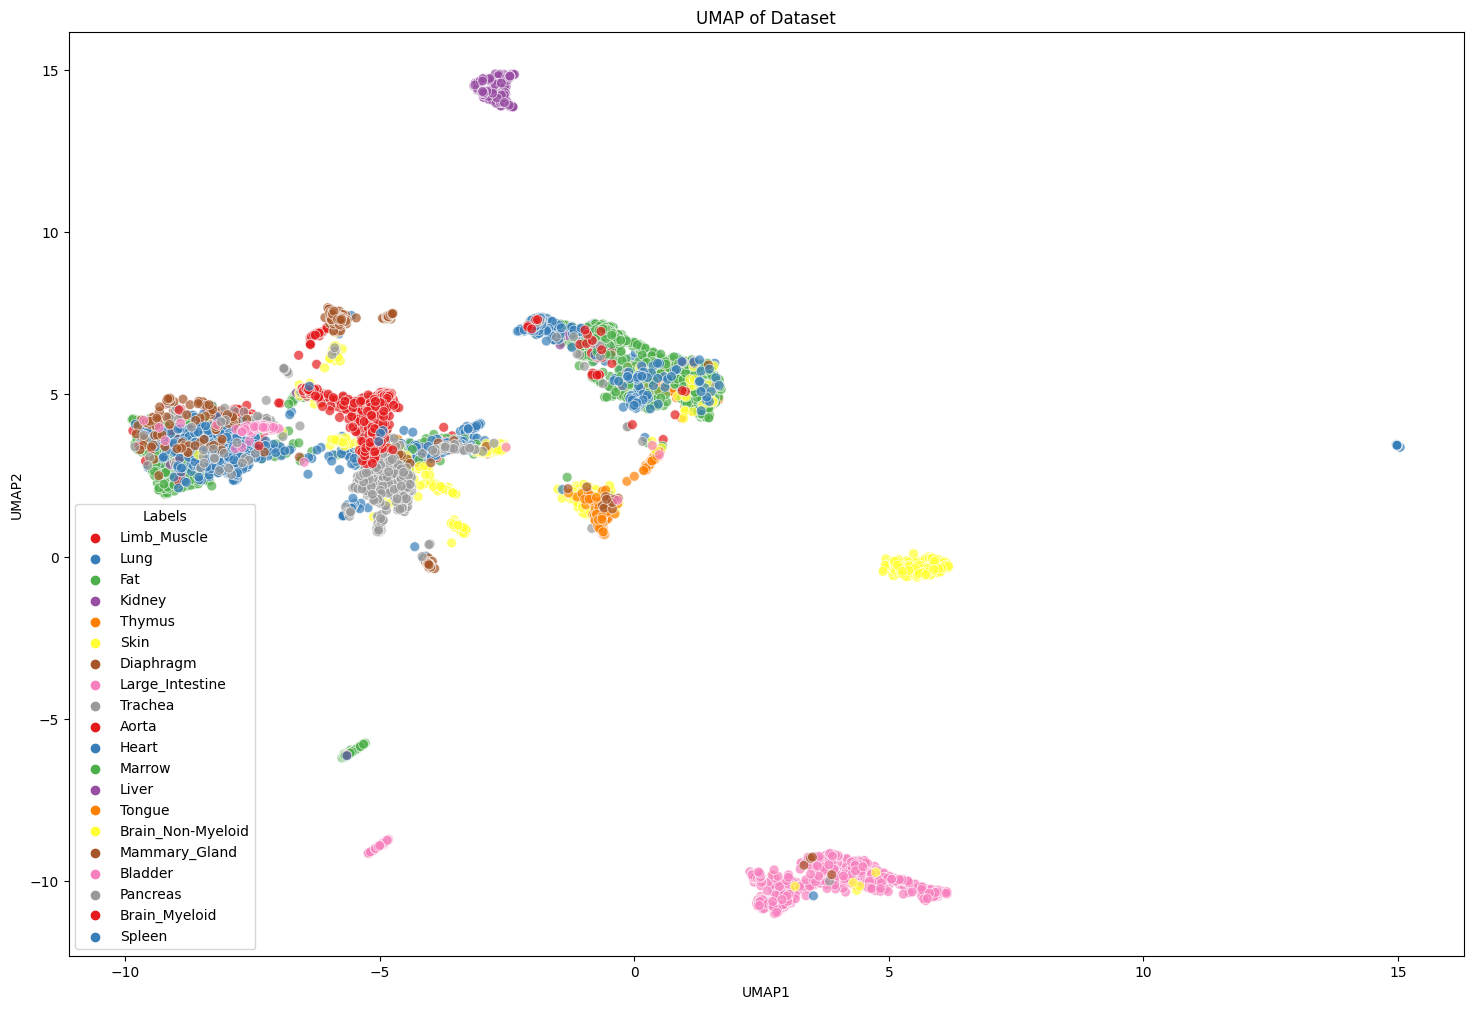

In [31]:
# Plotting the UMAP result
plt.figure(figsize=(18, 12))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='labels', data=df_umap, palette='Set1', s=50, alpha=0.7)
plt.title('UMAP of Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Labels')
plt.savefig("UMAP_plot.png", format='png', dpi=300)
plt.show()


# 4. KMEANS Clustering

## 4.1 Elbow Method

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

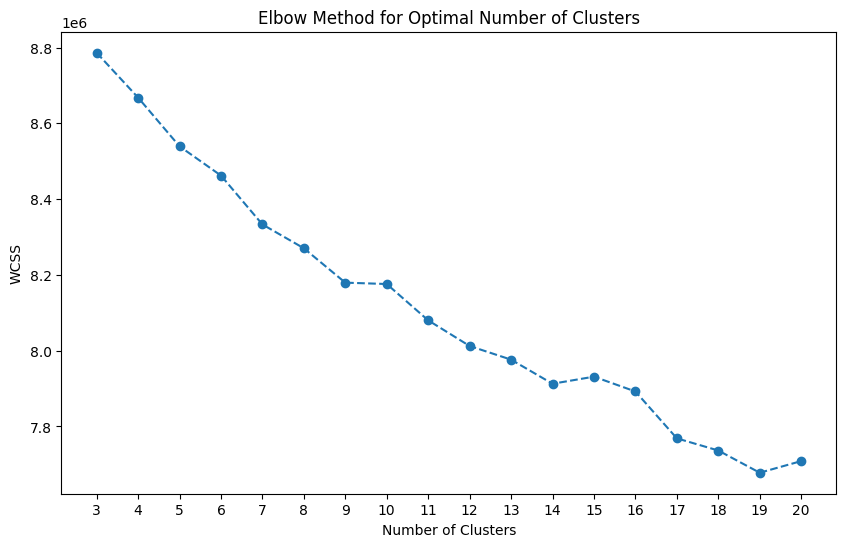

In [32]:
# Compute WCSS for different number of clusters
wcss = []
max_clusters = 20
for i in range(3, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(merged_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(3, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(3, max_clusters + 1))
plt.show()


In [42]:
n_clusters = 14

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(merged_df)

# save cluster labels to a variable
kmeans_labels = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
df_tsne['labels'] = kmeans_labels
df_umap['labels'] = kmeans_labels

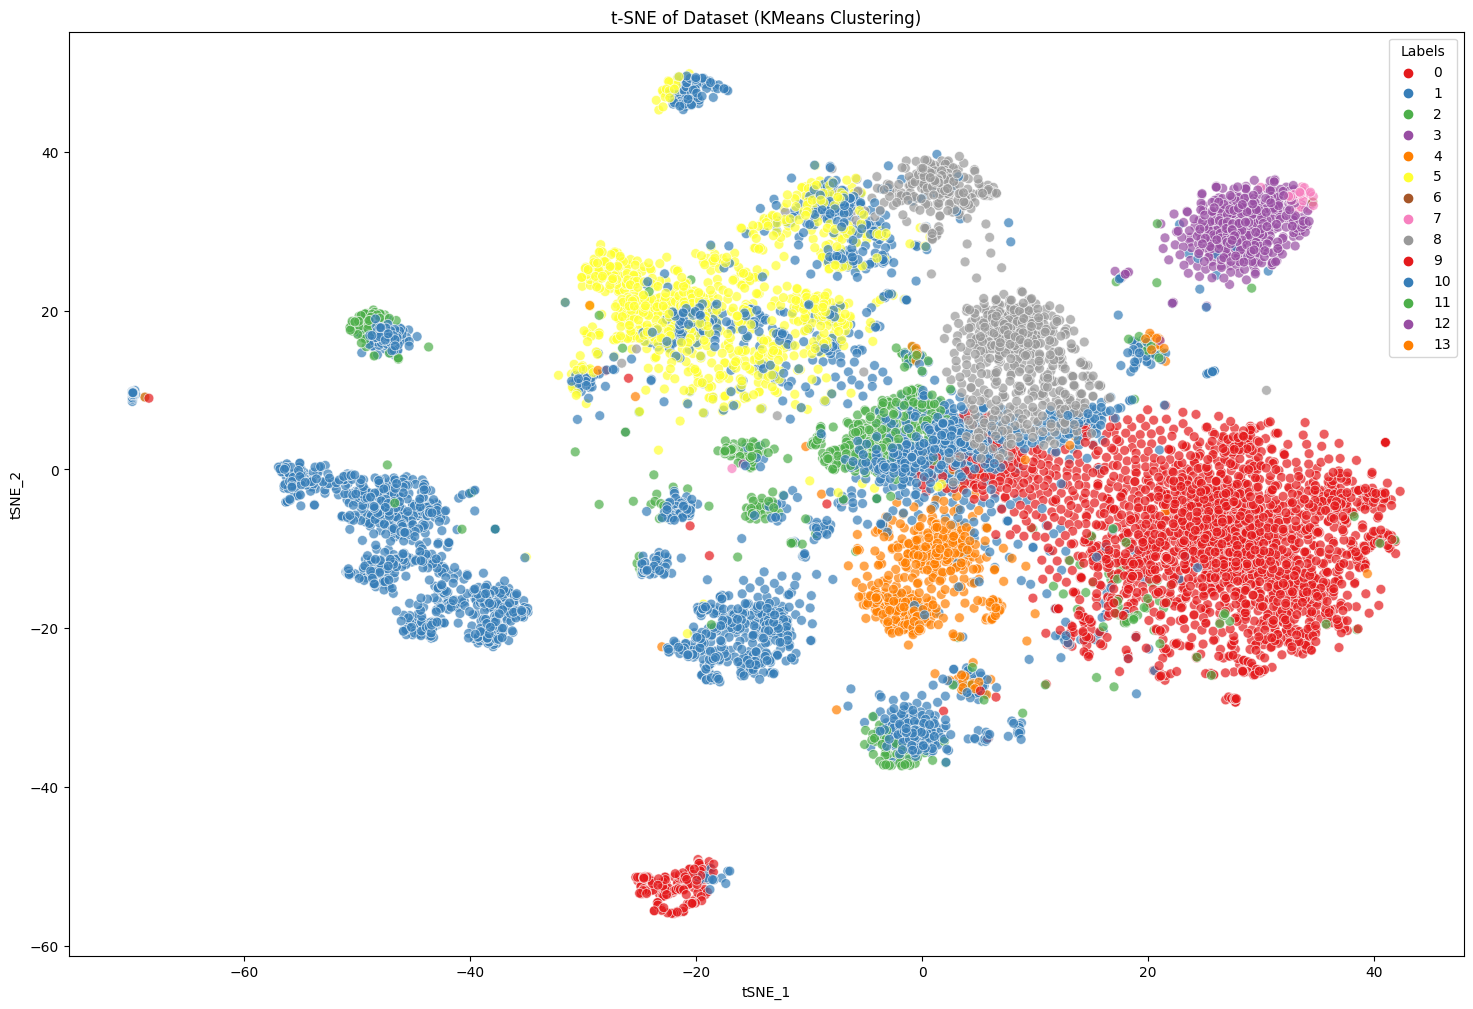

In [44]:
# Plotting the t-SNE result
plt.figure(figsize=(18, 12))
sns.scatterplot(x='tSNE_1', y='tSNE_2', hue='labels', data=df_tsne, palette='Set1', s=50, alpha=0.7)
plt.title('t-SNE of Dataset (KMeans Clustering)')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.legend(title='Labels')
plt.savefig("tSNE_plot_kmeans.png", format='png', dpi=300)
plt.show()


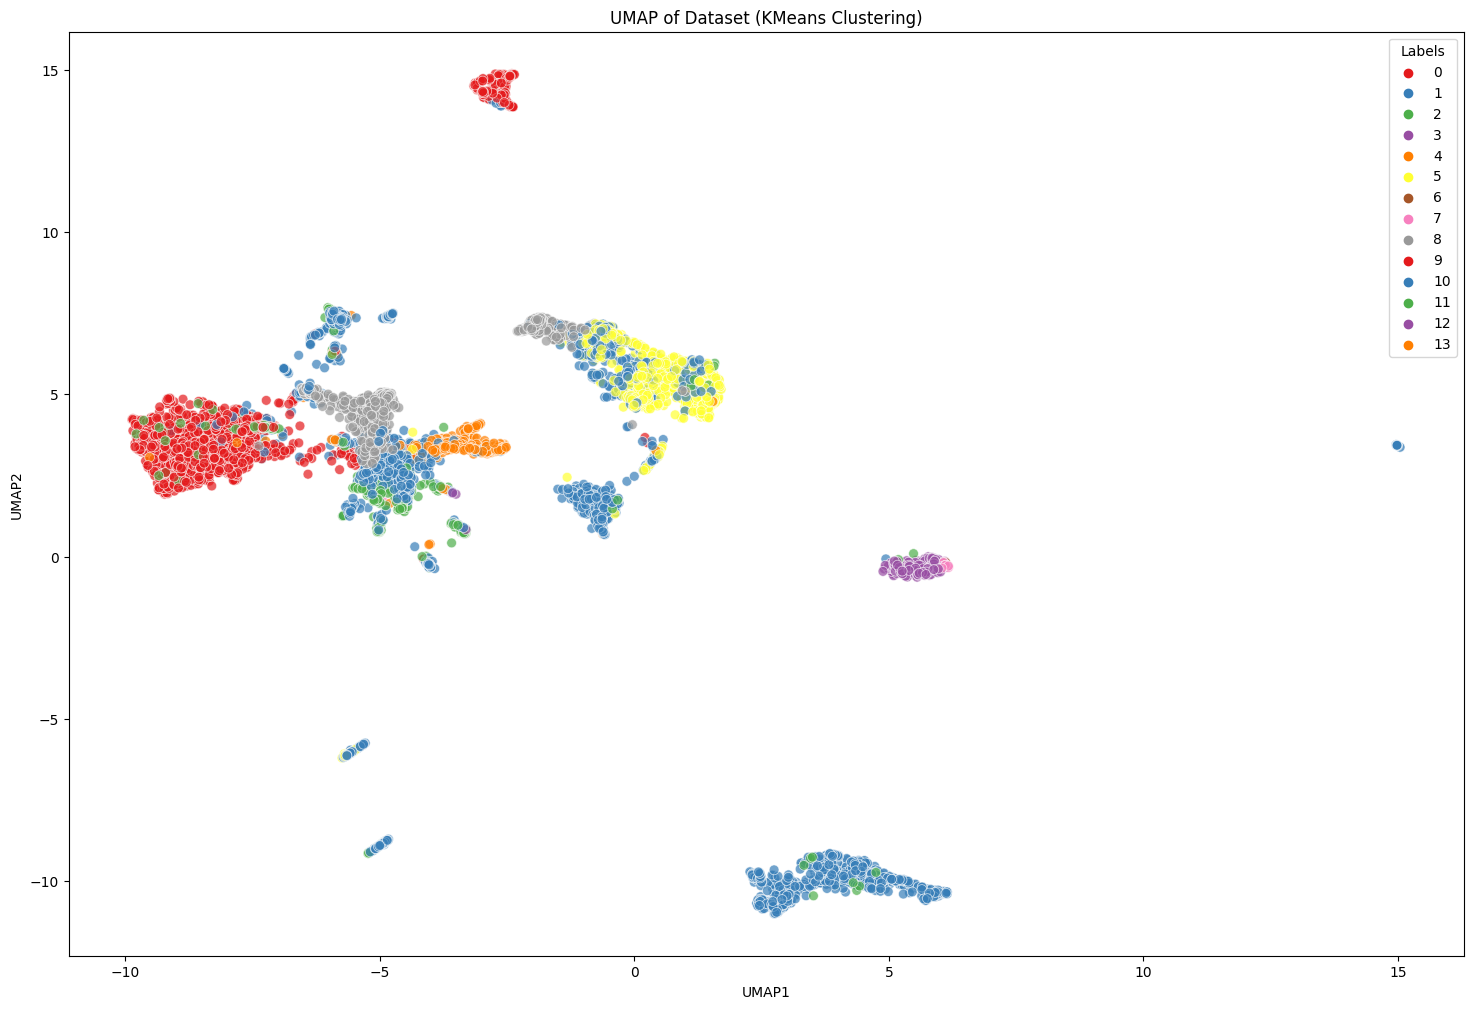

In [45]:
# Plotting the UMAP result
plt.figure(figsize=(18, 12))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='labels', data=df_umap, palette='Set1', s=50, alpha=0.7)
plt.title('UMAP of Dataset (KMeans Clustering)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Labels')
plt.savefig("UMAP_plot_kmeans.png", format='png', dpi=300)
plt.show()


# 5. Agglomerative Clustering

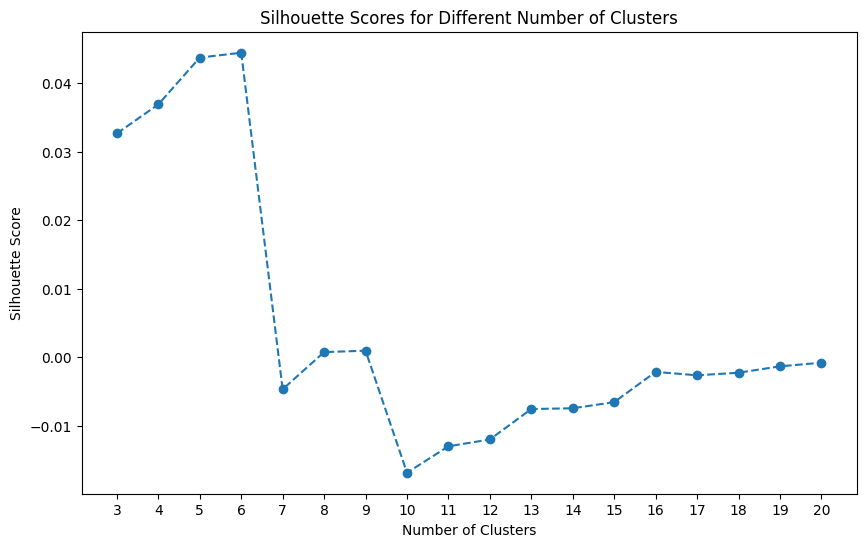

In [37]:
# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
max_clusters = 20
for i in range(3, max_clusters + 1):
    agg_clust = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agg_clust.fit_predict(merged_df)
    silhouette_avg = silhouette_score(merged_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(3, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(3, max_clusters + 1))
plt.show()

In [46]:
# Initialize the Agglomerative Clustering model
n_clusters = 10
agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model and predict cluster labels
agg_clust_labels = agg_clust.fit_predict(merged_df)


In [47]:
df_tsne['labels'] = agg_clust_labels
df_umap['labels'] = agg_clust_labels

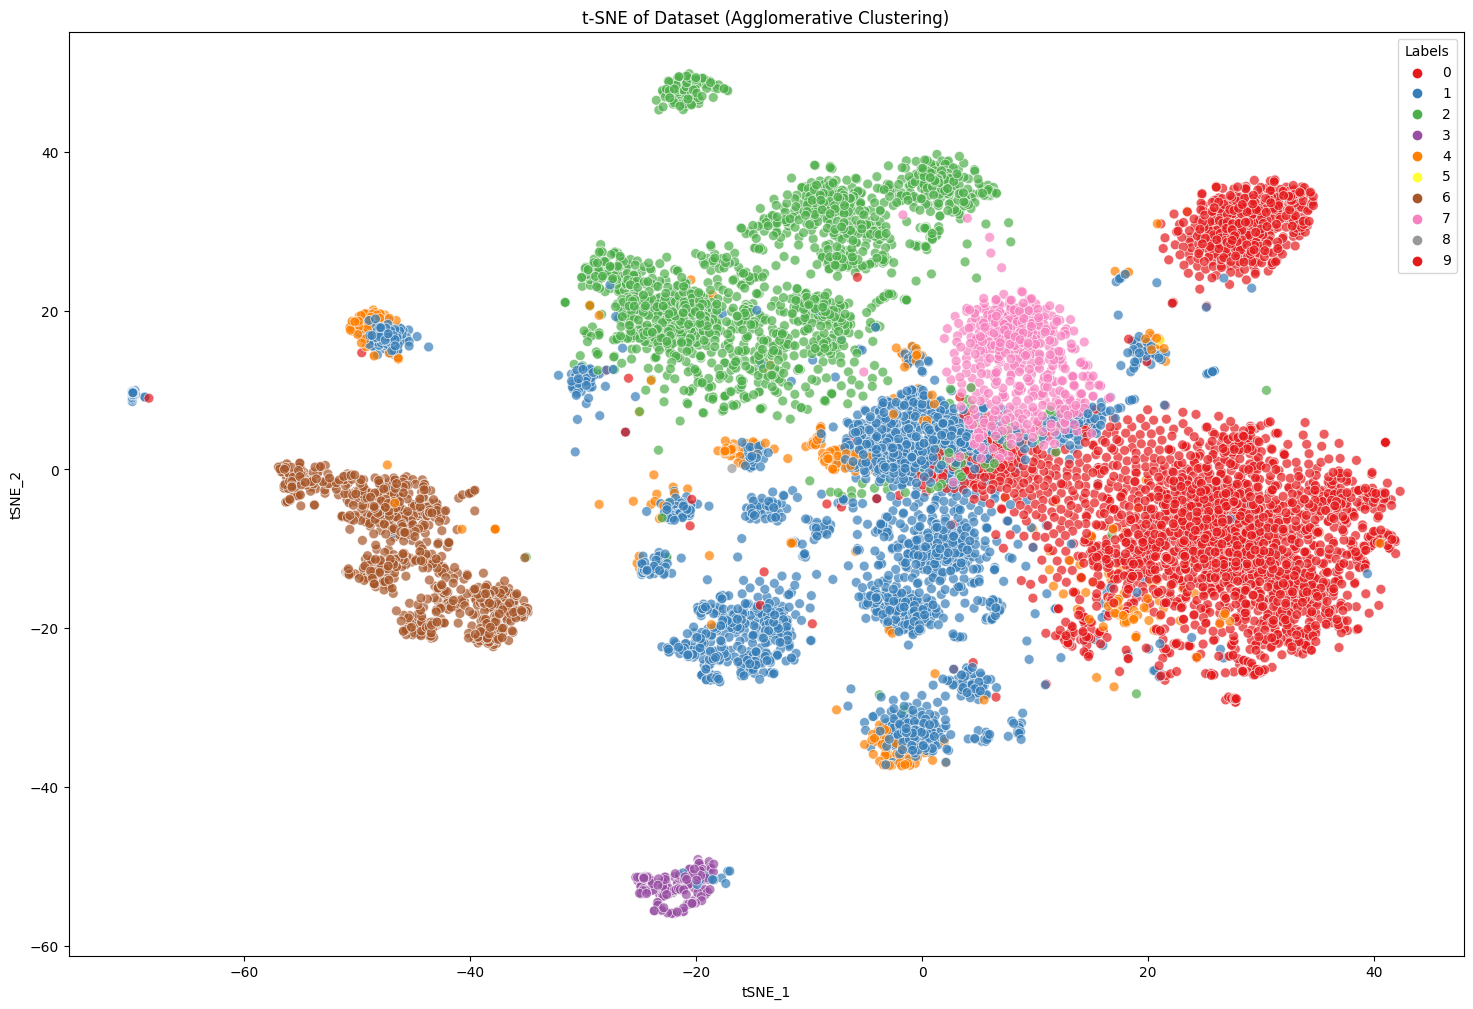

In [48]:
# Plotting the t-SNE result
plt.figure(figsize=(18, 12))
sns.scatterplot(x='tSNE_1', y='tSNE_2', hue='labels', data=df_tsne, palette='Set1', s=50, alpha=0.7)
plt.title('t-SNE of Dataset (Agglomerative Clustering)')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.legend(title='Labels')
plt.savefig("tSNE_plot_agg_clust.png", format='png', dpi=300)
plt.show()


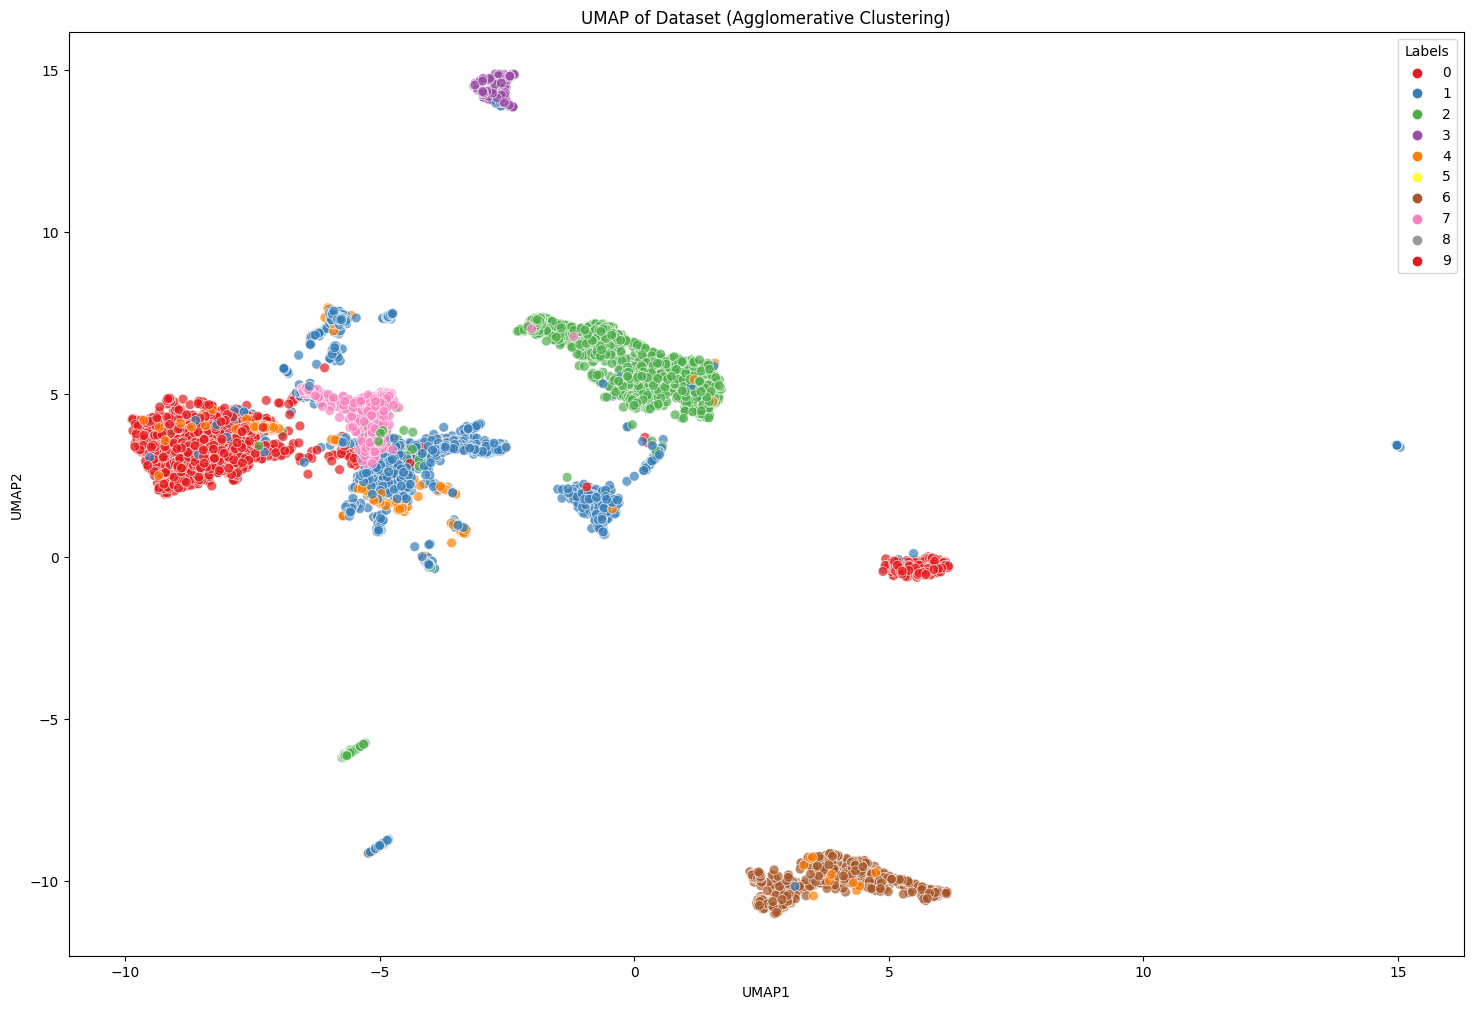

In [49]:
# Plotting the UMAP result
plt.figure(figsize=(18, 12))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='labels', data=df_umap, palette='Set1', s=50, alpha=0.7)
plt.title('UMAP of Dataset (Agglomerative Clustering)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Labels')
plt.savefig("UMAP_plot_agg_clust.png", format='png', dpi=300)
plt.show()
